# Tutorial for NumPy
NumPy, which is short for "Numbers Python", is a library for efficiently processing large volumes of numerical data in Python.  Like pandas, it is extremely important for machine learning, particularly for computer vision.  

The core data structure in NumPy is the **nd-array** (n-dimensional array).  This data structure uses [strided memory](https://en.wikipedia.org/wiki/Stride_of_an_array) for storing elements and computation, which means that all elements of the same nd-array must be of the same Python type.

In this tutorial, we will show you the power of NumPy, and in particular, how it can be used for computer vision.

## Import Block
Typically you will see `import numpy as np` written, but this is just convention.  You can write this import statement in whatever way works best for you.

In [1]:
# Import NumPy
import numpy as np 

# We will also be using opencv, an image processing library
! pip install opencv-python
import cv2 as cv

# We will use os to find specific paths in our directories
import os

## Intro to nd-arrays
The **nd-array**, or n-dimensional array, data structure is the core element of the numpy library.  In one dimension, they are very similar to the Python `list` data structure.  In two dimensions, you can think of these as nd-arrays as being similar to a `list` of `lists`.

The main difference between a native Python `list` and a numpy `nd-array` is that an `nd-array` is much more computationally efficient.  Let's see this below.

### Why Numpy Arrays?  Comparing Times to Compute

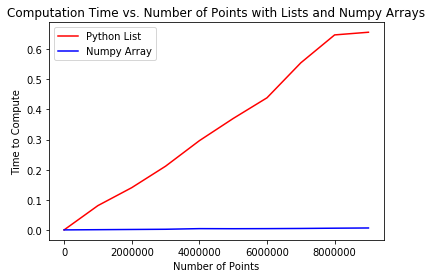

List Times 
 [9.298324584960938e-06, 0.0807197093963623, 0.14029502868652344, 0.21152210235595703, 0.2962808609008789, 0.3699676990509033, 0.43870973587036133, 0.5548577308654785, 0.6475427150726318, 0.6563997268676758]
Numpy Array Times 
 [7.605552673339844e-05, 0.0007669925689697266, 0.0014672279357910156, 0.002170085906982422, 0.004255771636962891, 0.003988742828369141, 0.004289150238037109, 0.004860639572143555, 0.005753517150878906, 0.006444692611694336]


In [7]:
import time
import matplotlib.pyplot as plt

# Store time to compute for Python list and numpy nd-array
list_times = []
nd_array_times = []
num_points = []

for i in range(10,10000010,1000000):
    
    num_points.append(i)
    
    python_list = [j for j in range(i)]
    t_list_start = time.time()
    total = 0
    for elt in python_list:
        total += elt
    t_list_end = time.time()
    list_times.append(t_list_end - t_list_start)
        
    np_array = np.arange(i)
    t_array_start = time.time()
    total = np.sum(np_array)
    t_array_end = time.time()
    nd_array_times.append(t_array_end - t_array_start)
    
# Plot both
plt.plot(num_points, list_times, color="r", label="Python List")
plt.plot(num_points, nd_array_times, color="b", label="Numpy Array")
plt.legend()
plt.xlabel("Number of Points")
plt.ylabel("Time to Compute")
plt.title("Computation Time vs. Number of Points with Lists and Numpy Arrays")
plt.show()

# Show the times
print("List Times \n {}".format(list_times))
print("Numpy Array Times \n {}".format(nd_array_times))

As we can see, numpy is significantly faster for **vector** and **matrix** operations, such as adding an array of numbers.  We will be using numpy a lot this week and next week to greatly speed up our code.

### Basic Operations with **nd-arrays**
Let's start working with these data structures!

#### Creating Numpy Arrays

In [3]:
# Can create numpy arrays using the following function
A = np.array([1, 2, 3, 4])
print("A is: \n {}".format(A))

# Can also create numpy arrays from lists!
B = [1, 2, 3, 4]  # List in Python
C = np.array(B)
print("C is: \n {}".format(C))

# Elements do not have to be integers
D = [0.01, -5.7, 10.2, 0.000076]
print("D is: \n {}".format(D))


A is: 
 [1 2 3 4]
C is: 
 [1 2 3 4]
D is: 
 [0.01, -5.7, 10.2, 7.6e-05]


#### Dimensionality, Row, and Column Vectors
We can think of nd-arrays as vectors (in one dimension), matrices (in two dimensions), or tensors (any dimension).  Numpy has many different ways in which we can get information on or change the dimensions of these nd-arrays.


In [4]:
# Create a "row vector":
E = np.array([[1, 2, 3, 4]])
print("E is: \n {}".format(E))

# We can get the shape of a nd-array through the "shape" attribute
print("Shape of E is: {}".format(E.shape))

# Now let's create a "column vector"
F = np.array([[1], [2], [3], [4]])
print("F is: \n {}".format(F))

# We can get the shape of a nd-array through the "shape" attribute
print("Shape of F is: {}".format(F.shape))

# We can also change a row vector to a column vector through taking the transpose!
G = np.array(E).T  # Take the transpose with ".T"
print("G is: \n {}".format(G))

# We can get the shape of a nd-array through the "shape" attribute
print("Shape of G is: {}".format(G.shape))

print("F and G have the same shape!")

E is: 
 [[1 2 3 4]]
Shape of E is: (1, 4)
F is: 
 [[1]
 [2]
 [3]
 [4]]
Shape of F is: (4, 1)
G is: 
 [[1]
 [2]
 [3]
 [4]]
Shape of G is: (4, 1)
F and G have the same shape!


#### Matrices in Numpy
Much of computer vision deals with operations on matrices.  Numpy has a great amount of functionality built in for handling computations on matrices.  Let's see this below.

In [5]:
# Create the array
H = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print("H is: \n \n {}".format(H))

# We can get the shape of a nd-array through the "shape" attribute
print("\n Shape of H is: {}".format(H.shape))

H is: 
 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

 Shape of H is: (3, 3)


#### Some Common Vector Operations in Python
We can now explore some common types of vector data in Python.

##### 1. np.arange(start, stop, step)
Function for creating an nd-array from the range start to stop, with step size given by step.

In [6]:
# Create array from function
I = np.arange(0,100,10)

print("I is: \n \n {}".format(I))

# We can get the shape of a nd-array through the "shape" attribute
print("\n Shape of I is: {}".format(I.shape))


I is: 
 
 [ 0 10 20 30 40 50 60 70 80 90]

 Shape of I is: (10,)


##### 2. np.sum(array, axis=?)
Function for computing the sum of an array.  For one-dimensional arrays, such as lists, this will simply sum all the elements of that list.  For multi-dimensional arrays such as matrices, however, we have the power to not just take the sum of all the elements in the matrix, but to compute the sum along individual axes.  This **axis/axes** argument is used for many numpy functions, and is very useful for more complicated mathematical operations, such as normalization of probability distributions.  

A diagram of the different axes numbers is given below:
![Axes Diagram]("notebook_diagrams/axes.png")